## N-grams?

N-grams are the continuous sequence of words/tokens in documents. 
`Neighbouring sequences of items in documents`
They have a wide range of applications, like language models, semantic features, spelling correction, machine translation, text mining, etc.

### Types?

* 1-gram **(Unigrams)**
* 2-grams **(Bigrams)**
* ... n-grams

    1	Unigram	[“I”,”reside”,”in”,”Bengaluru”] 
    
    2	Bigram	[“I reside”,”reside in”,”in Bengaluru”]
    
    3	Trigram	[“I reside in”, “reside in Bengaluru”]


In [ ]:
!ls

all-data.csv  N-grams.ipynb


### Dataset - Sentiment analysis for finance dataset

[here](https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news)

In [2]:
import pandas as pd 

df = pd.read_csv("./all-data.csv" , encoding="ISO-8859-1" , header=None , )
df.head()

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [3]:
df.rename(columns= {0:"sentiment" , 1:"text"} , inplace = True)
print(df)

     sentiment                                               text
0      neutral  According to Gran , the company has no plans t...
1      neutral  Technopolis plans to develop in stages an area...
2     negative  The international electronic industry company ...
3     positive  With the new production plant the company woul...
4     positive  According to the company 's updated strategy f...
...        ...                                                ...
4841  negative  LONDON MarketWatch -- Share prices ended lower...
4842   neutral  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843  negative  Operating profit fell to EUR 35.4 mn from EUR ...
4844  negative  Net sales of the Paper segment decreased to EU...
4845  negative  Sales in Finland decreased by 10.5 % in Januar...

[4846 rows x 2 columns]


In [4]:
df.isna().sum()

sentiment    0
text         0
dtype: int64

In [5]:
df.isnull().sum()

sentiment    0
text         0
dtype: int64

In [6]:
df['sentiment'].value_counts()

sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64

In [7]:
X = df.iloc[:, -1]
y = df.iloc[:,0]
# print(X)
# print(y)

In [8]:
# Train test split
from sklearn.model_selection import train_test_split

X_train ,X_test ,  y_train ,y_test = train_test_split(X,y, random_state=42, test_size=0.4) 

In [9]:
X_train.shape , X_test.shape

((2907,), (1939,))

### String Preprocessing


In [10]:
import re 

def remove_punctuation(text):
    pattern = r'[^\w\s]+'
    
    return re.sub(pattern,"", text)
# print(remove_punctuation("asdas.."))
df['text'] = df['text'].apply(lambda x: remove_punctuation(x))
df.head()

,sentiment,text
0,neutral,According to Gran the company has no plans to...
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company s updated strategy fo...


In [14]:
from nltk.corpus import stopwords
# df['text'].apply( stopwords.words("english") )

In [26]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
#   print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [27]:
#sample!
generate_N_grams("The sun rises in the east",1)

['The', 'sun', 'rises', 'east']

* Create unigrams for each of the news records belonging to each of the three categories of sentiments.
* Store the word and its count in the corresponding dictionaries.
* Convert these dictionaries to corresponding data frames.
* Fetch the top 10 most frequently used words.
* Visualize the most frequently used words for all the 3 categories-positive, negative and neutral.

In [28]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)

In [29]:
for text in df[df.sentiment=="positive"].text:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

In [30]:
for text in df[df.sentiment=="negative"].text:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

In [31]:
for text in df[df.sentiment=="neutral"].text:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

In [32]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [40]:
df_positive.head()

,0,1
0,,3811
1,EUR,394
2,The,280
3,mn,241
4,company,230


In [33]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

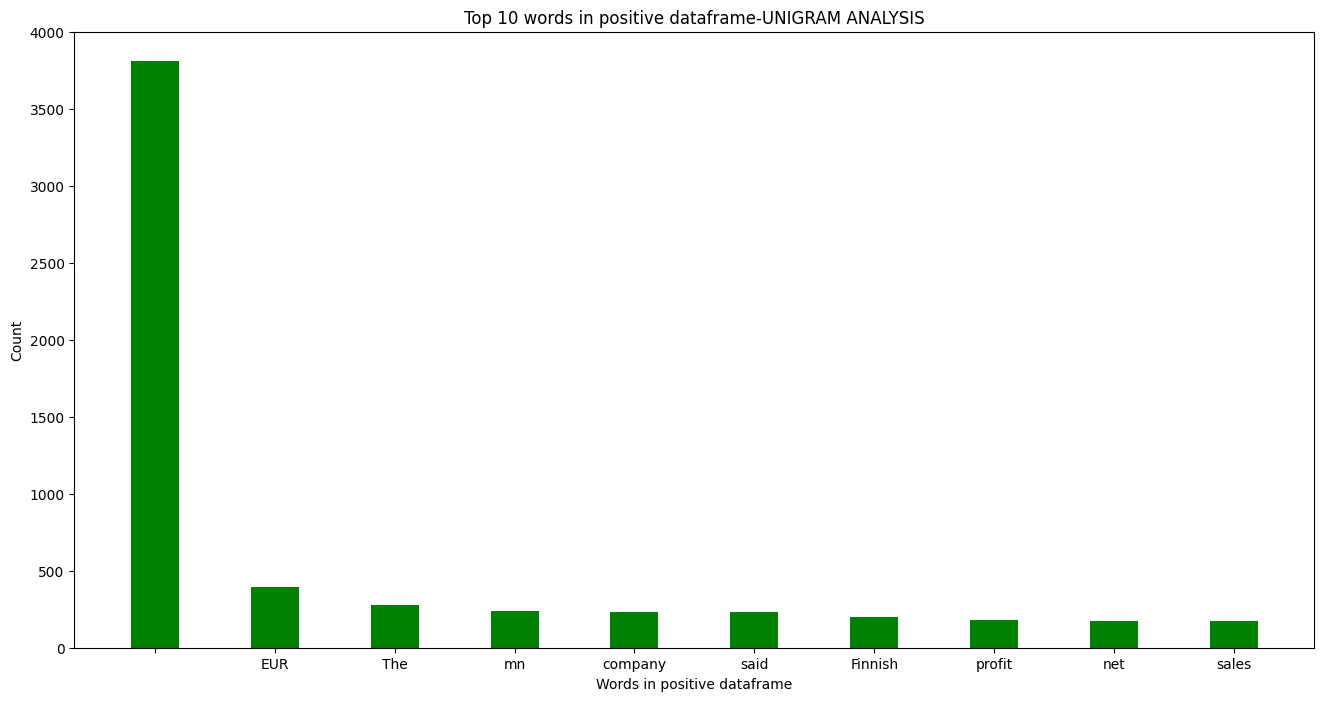

In [35]:
import matplotlib.pyplot as plt  
plt.figure(1,figsize=(16,8))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

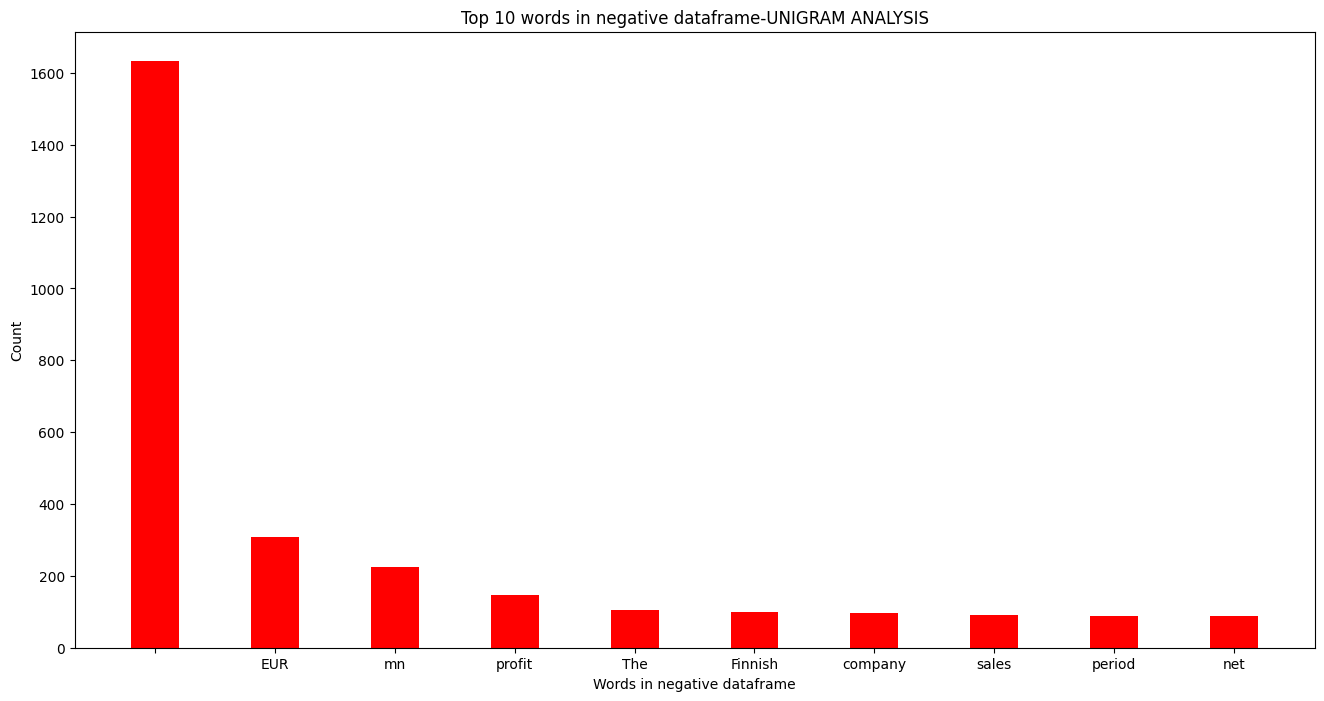

In [36]:
plt.figure(1,figsize=(16,8))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

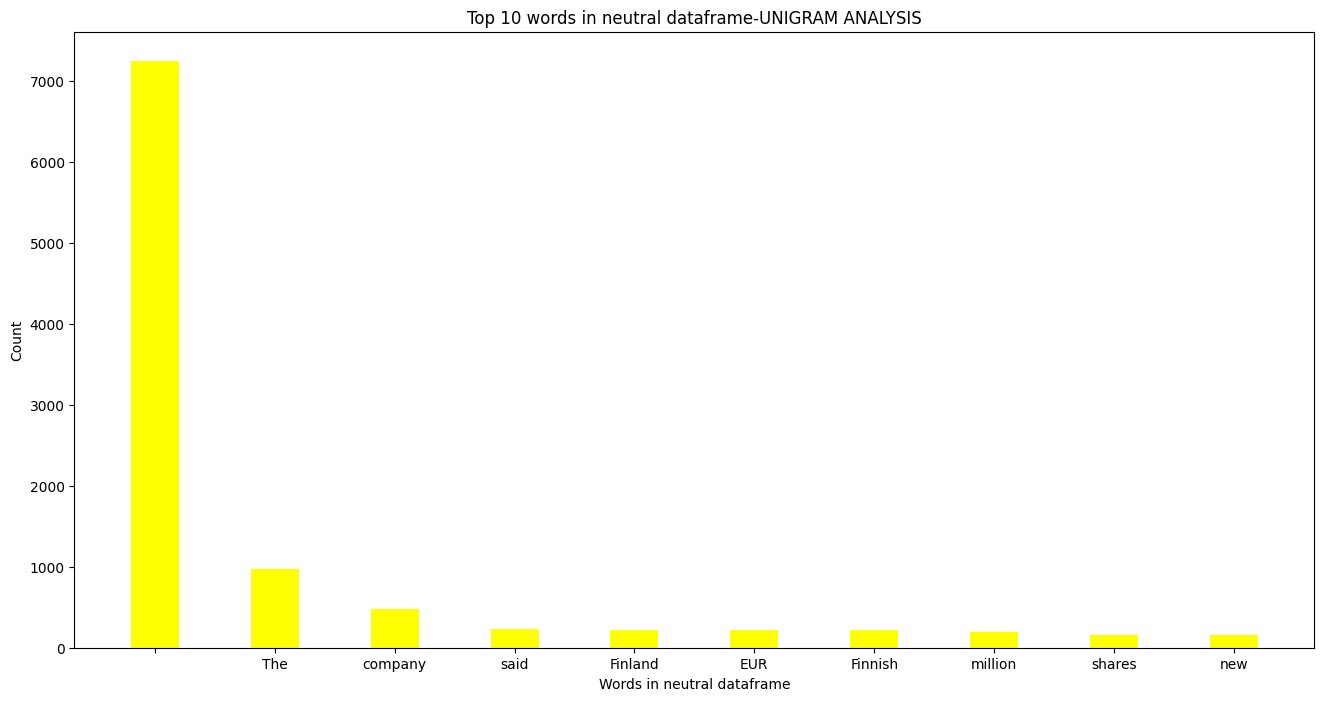

In [37]:
plt.figure(1,figsize=(16,8))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()